# 讀入套件

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 資料讀取與資料預處理

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

### 查看資料的 shape

In [4]:
x_train.shape

(60000, 28, 28)

## 改變資料的 shape

## 一個 Channel，從 (28,28) → (28,28,1)

In [5]:
x_train = x_train.reshape(60000,28,28,1)/255

In [6]:
x_test = x_test.reshape(10000,28,28,1)/255

### 確認更改後資料的 shape 是否正確

In [7]:
x_train[100].shape

(28, 28, 1)

In [8]:
y_train[100]

8

## 進行 one hot encoding

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape,y_test.shape,sep='\n')

(60000, 10)
(10000, 10)


# 開始建立 CNN 神經網路

## 讀入必要的函式

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

## Step1 打造函數學習機 (CNN)

In [11]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same', input_shape=(28,28,1), activation='relu')) #輸出 16 個 28*28 矩陣，事實上是 (28,28,16)
model.add(MaxPooling2D(pool_size=(2,2))) #Maximum Pooling Output = (14,14,16)
model.add(Conv2D(32,(5,5),padding='same', activation='relu')) #輸出 32 個 14*14 矩陣，事實上是 (14,14,32)
model.add(MaxPooling2D(pool_size=(2,2))) #Maximum Pooling Output = (7,7,32)
model.add(Conv2D(64,(5,5),padding='same', activation='relu')) #輸出 64 個 7*7 矩陣，事實上是 (7,7,64)
model.add(MaxPooling2D(pool_size=(2,2))) #Maximum Pooling Output = (3,3,64)
model.add(Conv2D(128,(3,3),padding='same', activation='relu')) #輸出 128 個 3*3 矩陣，事實上是 (3,3,128)
model.add(MaxPooling2D(pool_size=(2,2))) #Maximum Pooling Output = (3,3,64)

In [12]:
model.add(Flatten()) #拉平神經網路

In [13]:
model.add(Dense(120, activation='relu'))

## 輸出層為10個神經元
## 激勵函數 : softmax

In [14]:
model.add(Dense(10,activation='softmax'))

## 檢視神經網路

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

### conv2d = ( 3 x 3 + 1 ) x 16 = 160

### conv2d_1 = (( 5 x 5 x 16 ) + 1 ) x 32 = 12832

### conv2d_2 = (( 5 x 5 x 32 ) + 1 ) x 64 = 51264

### conv2d_3 = (( 3 x 3 x 64 ) + 1 ) x 128 = 73856

### 1 x 1 x 128 = 128

### dense = 128 x 120 + 120 = 15480

### dense_1 = 120 x 10 + 10 = 1210

## 損失函數 : mae
## 優化器 : Adam 
## Adam 優化器之參數設置 : learning_rate=0.001, beta_1=0.9, beta_2=0.999

In [16]:
model.compile(loss='mae',optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),metrics=['accuracy'])

## batch size 設置為 100
## 訓練次數為 30 次

## Step2 fit

In [17]:
model.fit(x_train,y_train,batch_size=100,epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 59s 991us/sample - loss: 0.0842 - accuracy: 0.5843
Epoch 2/30
60000/60000 [==============================] - 59s 989us/sample - loss: 0.0550 - accuracy: 0.7276
Epoch 3/30
60000/60000 [==============================] - 58s 965us/sample - loss: 0.0324 - accuracy: 0.8399
Epoch 4/30
60000/60000 [==============================] - 58s 959us/sample - loss: 0.0268 - accuracy: 0.8679- loss: 0.0268 - 
Epoch 5/30
60000/60000 [==============================] - 59s 978us/sample - loss: 0.0249 - accuracy: 0.8771
Epoch 6/30
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0231 - accuracy: 0.8857
Epoch 7/30
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0222 - accuracy: 0.8900
Epoch 8/30
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0210 - accuracy: 0.8958
Epoch 9/30
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0204 - accu

## Step3 預測

In [26]:
result = model.predict_classes(x_test)

In [27]:
labelname_dict = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

In [28]:
from ipywidgets import interact_manual

In [29]:
def predict_xy(測試編號=0):
    ax = plt.gca()
    X = x_test[測試編號]
    plt.xticks([],[])
    plt.yticks([],[])
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print(f'神經網路預測的答案為: {labelname_dict[result[測試編號]]}')
interact_manual(predict_xy,測試編號=(0,9999));

interactive(children=(IntSlider(value=0, description='測試編號', max=9999), Button(description='Run Interact', sty…

神經網路預測是: Bag


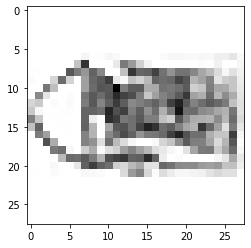

In [30]:
n=3822
print('神經網路預測是:',labelname_dict[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

In [31]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 369us/sample - loss: 0.0206 - accuracy: 0.8970


### 檢查是否有產生 Overfitting 的問題

In [32]:
loss, acc = score
print('測試資料正確率為:',acc)

測試資料正確率為: 0.897


## 將 Model 儲存起來

In [33]:
model.save('myCNNmodel.h5')

## Model Structure:

### Conv 3 x 3, 16 

### Conv 5 x 5, 32

### Conv 5 x 5, 64

### Conv 3 x 3, 128

### loss funtion = mae

### Optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### Batch size = 100

### epochs = 30